In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#1
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [82]:
#2
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['Price'] = housing.target
df.drop(df.loc[501:].index, inplace=True)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
496,3.2619,52.0,4.792053,1.017219,1508.0,1.997351,37.85,-122.26,3.096
497,2.7054,52.0,5.001227,1.128834,1800.0,2.208589,37.85,-122.27,1.823
498,2.2431,47.0,6.371166,1.226994,719.0,2.205521,37.85,-122.27,1.727
499,1.9028,50.0,5.015686,1.176471,675.0,2.647059,37.85,-122.27,1.508


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64
              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.000665  0.746365  -0.234492   -0.096259 -0.160496   
HouseAge   -0.000665  1.000000  0.086414  -0.040580   -0.131083  0.032991   
AveRooms    0.746365  0.086414  1.000000   0.148035   -0.202002 -0.096573   
AveBedrms  -0.234492 -0.040580  0.148035   1.000000    0.011068 -0.030155   
Population -0.096259 -0.131083 -0.202002   0.011068    1.000000  0.048711   
AveOccup   -0.160496  0.032991 -0.096573  -0.030155    0.048711  1.000000   
Latitude    0.273408  0.243765  0.108865  -0.088388    0.020740 -0.325261   
Longitude   0.174155 -0.235794  0.224245  -0.092807    0.004481  0.217278   
Price       0.740480  0.045427  0.471831  -0.257614    0.057150 -0.238242   

            Latitude  Longitude     Price  
MedInc      0.273408   0.174

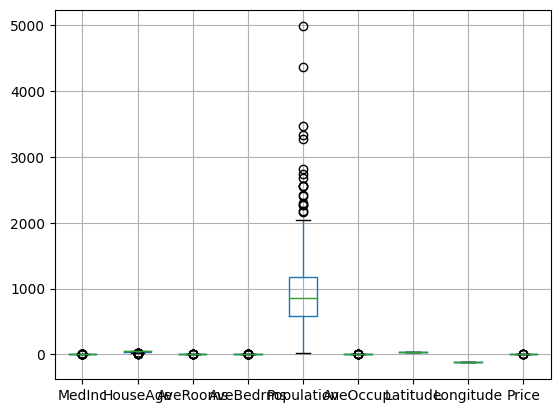

In [83]:
#3
print(df.isnull().sum())
df.boxplot()
print(df.corr())

In [84]:
#4
from sklearn.model_selection import train_test_split

X = df.drop("Price", axis=1)
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [85]:
#5
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([2.85614947, 0.93778151, 1.4437813 , 3.23891908, 1.83498401,
       2.00191668, 1.03013608, 3.44183233, 0.66941889, 2.11076222,
       2.4025237 , 1.56769854, 4.21313248, 1.00889354, 2.35065076,
       3.73013537, 2.34477377, 1.49935331, 0.72551802, 4.60108028,
       2.88398086, 2.11855663, 2.80958566, 1.42699514, 1.27825123,
       2.1779977 , 1.71102812, 2.02717855, 1.97142356, 0.85465456,
       3.46115126, 1.21640796, 2.05650379, 1.31196803, 3.30625447,
       0.98838853, 3.25017567, 0.84533213, 0.96644576, 0.40223026,
       2.57136436, 1.1024519 , 2.38629561, 1.71827438, 1.29296126,
       0.79486519, 4.16833947, 2.34335943, 3.22561575, 1.55838369,
       0.79569894, 1.37501098, 4.7335819 , 3.26288908, 0.94673318,
       1.0951991 , 1.73671841, 1.71485015, 1.26030282, 0.71276697,
       2.99234928, 1.4555604 , 0.778578  , 1.96878423, 0.92376705,
       1.89093826, 2.4315614 , 1.60617574, 1.53799656, 2.46275179,
       0.94643988, 0.954517  , 1.78353544, 2.03686057, 0.97102

In [86]:
#6
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(mae)
print(mse)
print(rmse)
print(r2)

0.35562541661127267
0.22911013607488326
0.4786545059590302
0.8005699718233299


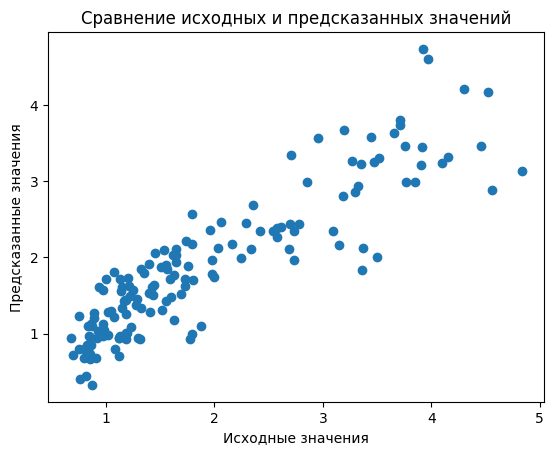

In [87]:
#7
plt.scatter(y_test, y_pred)
plt.xlabel("Исходные значения")
plt.ylabel("Предсказанные значения")
plt.title("Сравнение исходных и предсказанных значений")
plt.show()

In [88]:
#8
from sklearn.model_selection import cross_val_score

cv_mse = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
cv_rmse = np.sqrt(-cv_mse)
cv_r2 = cross_val_score(model, X, y, scoring='r2', cv=5)
print(np.mean(cv_mse))
print(np.mean(cv_rmse))
print(np.mean(cv_r2))

-0.33503790370964837
0.5594442171966664
0.5382514581328433


In [90]:
#9

feature_importance = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
feature_importance = feature_importance.sort_values(by="Coefficient", ascending=False)
feature_importance

,Feature,Coefficient
6,Latitude,14.566360
7,Longitude,6.949281
0,MedInc,0.280764
4,Population,0.000134
1,HouseAge,-0.000219
5,AveOccup,-0.001438
2,AveRooms,-0.037865
3,AveBedrms,-0.542266
